# Predicting the Likelihood of Heart Disease within a Patient

## Introduction
Heart disease describes a group of serious medical conditions that affect the heart and blood vessels. There are several types of heart disease including heart failure, arrhythmia, valvular heart disease, and congenital heart disease. They all depict several states in which the flow of blood is unable to properly circulate throughout the heart. Due to insufficient blood, a range of symptoms can occur that significantly affect the patient’s quality of life including chest pain, fatigue, nausea and shortness of breath. Heart disease is one of the leading causes of death, accounting for almost one-third of all deaths. With our project, we plan to address the question: “Is there a correlation between the variables in the dataset outcome of whether individuals have heart disease?” The dataset we selected contains the recorded health of various patients that are either tested positive or negative for heart disease. Through an algorithm, we plan to analyze degrees of correlation between the fourteen different recorded variables of patients in Cleveland that are with and without heart disease within the dataset. Through this analysis, we will be able to determine whether or not the presence of heart disease can be detected based on a correlation between variables. Our end goal for this group project is to be able to use this dataset to detect with a level of certainty, whether or not a patient will test positive for heart disease.

## Preliminary Exploratory Data Analysis

In [1]:
#loading all packages
library(tidymodels)
library(tidyverse)
library(repr)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ recipes      1.0.1
✔ dials        1.0.0     ✔ rsample      1.0.0
✔ dplyr        1.0.9     ✔ tibble       3.1.7
✔ ggplot2      3.3.6     ✔ tidyr        1.2.0
✔ infer        1.0.2     ✔ tune         1.0.0
✔ modeldata    1.0.0     ✔ workflows    1.0.0
✔ parsnip      1.0.0     ✔ workflowsets 1.0.0
✔ purrr        0.3.4     ✔ yardstick    1.0.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ forcats 0.5.1
✔ stringr 1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() 

In [2]:
#read csv file from UCI
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- read_csv(url, col_names = FALSE)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
# Cleaning and wrangling data
# Added meaningful column names. 
# We changed the orignal attribute name "num" to "Heart_Disease" because "num" had little meaning

set.seed(1)

heart_data <- rename(heart_data,
                     Age = X1,
                     Sex = X2,
                     Chest_Pain_Type = X3,
                     Resting_Blood_Pressure = X4,
                     Serum_Cholestoral = X5,
                     Fasting_Blood_Sugar = X6,
                     Resting_Electrocardiographic_Results = X7,
                     Maximum_Heart_Rate = X8,
                     Exercise_Induced_Angina = X9,
                     ST_Depression = X10,
                     Slope_Peak_excercise = X11,
                     Major_Vessels = X12,
                     Thalassemia = X13,
                     Heart_Disease = X14)

ERROR: [1m[33mError[39m in [1m[1m`chr_as_locations()`:[22m
[33m![39m Can't rename columns that don't exist.
[31m✖[39m Column `X1` doesn't exist.


In [ ]:
# We only want to know if each patient is tested positive or negative for heart disease
# This means we only need the numbers 0 (negative) and 1 (postive) and want to remove other numbers
# We reassigned the numbers 2, 3, and 4 to 1 because numbers that are greater 1 also mean that the patient has heart disease

heart_data$Heart_Disease[heart_data$Heart_Disease== "4"]<- "1"
heart_data$Heart_Disease[heart_data$Heart_Disease== "3"]<- "1"
heart_data$Heart_Disease[heart_data$Heart_Disease== "2"]<- "1"

heart_data

In [ ]:
# summarizing the data in one table

summary_table <- summarize(heart_data,
                   mean_age = mean(Age, na.rm = TRUE),
                   median_age = median(Age, na.rm = TRUE),
                   mean_resting_blood_pressure = mean(Resting_Blood_Pressure, na.rm = TRUE),
                   median_resting_blood_pressure = median(Resting_Blood_Pressure, na.rm = TRUE),
                   mean_max_heart_rate = mean(Maximum_Heart_Rate, na.rm = TRUE),
                   median_max_heart_rate = median(Maximum_Heart_Rate, na.rm = TRUE),
                   number_heart_disease_0 = length(which(heart_data$Heart_Disease==0)),
                   number_heart_disease_1 = length(which(heart_data$Heart_Disease==1)),
                   number_rows_missing_data = sum(is.na(heart_data)))



summary_table


In [ ]:
# visualizing the data with at least one plot relevant to the analysis we plan to do 

heart_split <- initial_split(ckd_data, prop = 0.75, strata = num) 
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

heart_train
heart_test

#use box plots
#funny

In [ ]:
#Visulaizations (3) will consist of: 
#   age vs cholesterol (colored with heart disease) 
#   age vs resting heart rate (colored with heart disease) 
#   age vs sex (colored with heart disease) 

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'Age' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(obj

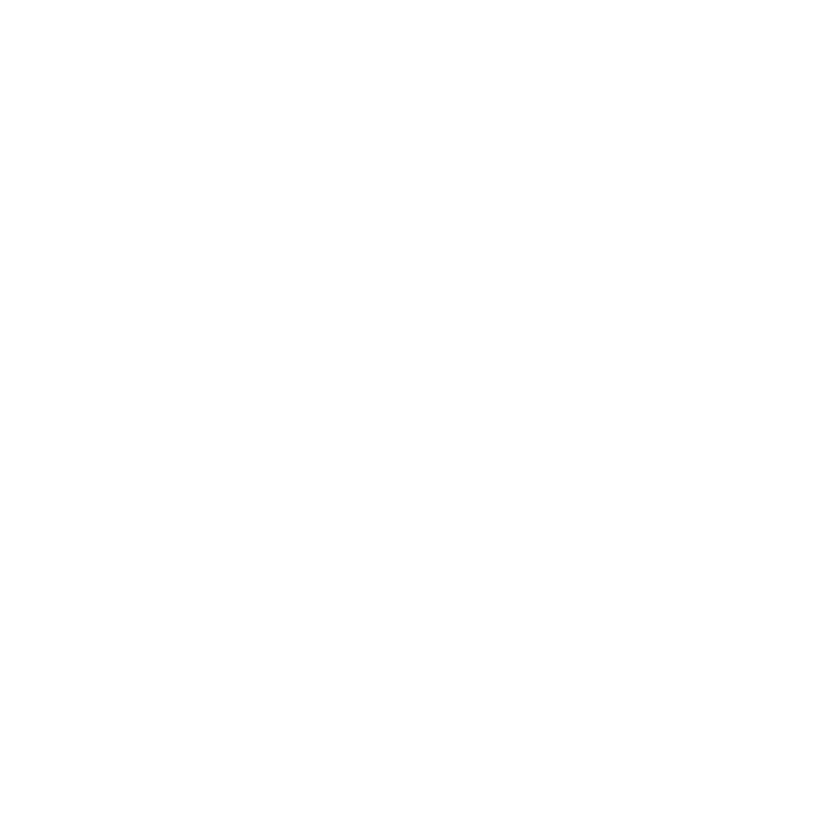

In [4]:
age_vs_cholesterol <- heart_data |>
    ggplot(aes(x = Age, y = Serum_Cholestoral, colour = Heart_Disease)) +
    geom_point(alpha = 0.6) +
    xlab("Age") +
    ylab("Cholestoral") +
    labs(color = "Diagnosis") +
    scale_color_manual(labels = c("Heart Disease", "No Heart Disease"), values = c("orange2", "steelblue2")) +
    theme(text = element_text(size = 25))
age_vs_cholesterol

In [ ]:
age_vs_HeartRate <- heart_data |>
    ggplot(aes(x = Age, y = Maximum_Heart_Rate, colour = Heart_Disease)) +
    geom_point(alpha = 0.6) +
    xlab("Age") +
    ylab("Maximum Heart Rate") +
    labs(color = "Diagnosis") +
    scale_color_manual(labels = c("Heart Disease", "No Heart Disease"), values = c("orange2", "steelblue2")) +
    theme(text = element_text(size = 25))
age_vs_HeartRate


In [ ]:
age_vs_Sex <- heart_data |>
    ggplot(aes(x = Age, y = Sex, colour = Heart_Disease)) +
    geom_point(alpha = 0.6) +
    xlab("Age") +
    ylab("Sex") +
    labs(color = "Diagnosis") +
    scale_color_manual(labels = c("Heart Disease", "No Heart Disease"), values = c("orange2", "steelblue2")) +
    theme(text = element_text(size = 25))
age_vs_Sex

